In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
eminem = pd.read_csv("Youtube04-Eminem.csv")  
eminem

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


In [3]:
eminem.drop(columns=['COMMENT_ID', 'AUTHOR','DATE'], inplace = True)
eminem   #spam = 1, ham(legimimate) = 0

,CONTENT,CLASS
0,+447935454150 lovely girl talk to me xxx﻿,1
1,I always end up coming back to this song<br />﻿,0
2,"my sister just received over 6,500 new <a rel=...",1
3,Cool﻿,0
4,Hello I&#39;am from Palastine﻿,1
...,...,...
443,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,Check out my videos guy! :) Hope you guys had ...,1
445,3 yrs ago I had a health scare but thankfully ...,1
446,Rihanna looks so beautiful with red hair ;)﻿,0


In [4]:
eminem.isna().any()

CONTENT    False
CLASS      False
dtype: bool

In [5]:
eminem.drop_duplicates(inplace = True)
eminem.duplicated().sum()

0

In [6]:
eminem[eminem['CLASS']== 1].count()

CONTENT    210
CLASS      210
dtype: int64

In [7]:
# ham
eminem[eminem['CLASS'] == 0].count()

CONTENT    202
CLASS      202
dtype: int64

## Data Preprocessing

In [8]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [9]:
'''
Create a function that
- changes all the words to lower case
- tokenize the words
- remove special characters
- remove stop words and punctuation
- stemming

'''

def text_processing(CONTENT):
    text = CONTENT.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for j in text:
        if j not in stopwords.words('english') and i not in string.punctuation:
            y.append(j)
    text = y[:]
    y.clear()

    for w in text:
        #y.append(ps.stem(w))     #incase for stemming
         y.append(w)
    return " ".join(y)

In [10]:
#Adding a new column for the processed text from the content column
eminem['TEXT_PROCESSED'] = eminem['CONTENT'].apply(text_processing)
eminem.head(20)

,CONTENT,CLASS,TEXT_PROCESSED
0,+447935454150 lovely girl talk to me xxx﻿,1,lovely girl talk
1,I always end up coming back to this song<br />﻿,0,always end coming back song br
2,"my sister just received over 6,500 new <a rel=...",1,sister received new nofollow https 23active ac...
3,Cool﻿,0,
4,Hello I&#39;am from Palastine﻿,1,hello 39
5,Wow this video almost has a billion views! Did...,0,wow video almost billion views 39 know popular
6,Go check out my rapping video called Four Whee...,1,go check rapping video called four wheels please
7,Almost 1 billion﻿,0,almost 1
8,Aslamu Lykum... From Pakistan﻿,1,aslamu lykum
9,Eminem is idol for very people in España and M...,0,eminem idol people españa mexico


In [11]:
spam_corpus = []
for msg in eminem[eminem['CLASS'] == 1]['TEXT_PROCESSED'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print('The length of spam words is',len(spam_corpus))

The length of spam words is 2156


In [12]:
ham_corpus = []
for msg in eminem[eminem['CLASS'] == 0]['TEXT_PROCESSED'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
print('The length of legitimate(ham) words is',len(ham_corpus))

The length of legitimate(ham) words is 820


## Model Building
Algorithm used are
- Support Vector Classification(Linear, Polynomial, Gaussian)
- The Naive Bayes Method(Multinomial, Bernouli, Gaussian)
- Random Forest
- Decision Tree(CART)
- KNNeighbor
- Logistics Regression

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000 )
X = tfidf.fit_transform(eminem['TEXT_PROCESSED']).toarray()
y = eminem['CLASS'].values
#X.shape
#X = CountVectorizer(analyzer=text_processing).fit_transform(psy['CONTENT'])
#bag_of_words.shape
X.shape


(412, 997)

In [14]:
'''
splitting the data into training and testing set 
importing the necessary library for the Supervised Techniques and checking the accuracy/validity of the model
'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score, matthews_corrcoef

In [15]:
svc_Linear = SVC()
svc_Polynomial = SVC(kernel='poly')
svc_Gaussian = SVC(kernel='rbf')
knc = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=80)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [16]:
clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

In [17]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

## Model Performance(UnOptimized)
- Matthew correlation Coefficient
- Accuracy
- Precision
- F_score
- Confusion Matrix

In [18]:
'''
   Using the Matthews correlation coefficient
'''

mcc_scores = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    current_mcc = matthews_corrcoef(y_test,clf.predict(X_test))
   
    print("==================")
    print(name)
    print(current_mcc)
    mcc_scores.append(current_mcc)


'''
    Checking the Accuracy, Precision, F-score and the confusion Matrix
'''

accuracy_scores = []
precision_scores = []
f1_scores = []
confusion_matrices = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1_score, confusion_matrice = train_classifier(clf, X_train,y_train,X_test,y_test)
    print('--------------------------------')
    print(name)
    print("Accuracy ",current_accuracy)
    print("Precision - ",current_precision)
    print("f1_scores" , current_f1_score) 
    print('Confusion Matrix\n ',confusion_matrice)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)
    confusion_matrices.append(confusion_matrice)

    print('--------------------------------')

SVM_Linear
0.6709619415698816
SVM_Polynomial
0.33414717421827017
SVM_Gaussian
0.6709619415698816
KNNeighbor
0.2872183902209853
CART
0.5204442161097913
LogisticsRegression
0.6510023255949701
RandomForest
0.5959742794701739
GaussianNB
0.49912748569280796
MultinomialNB
0.7104651162790697
BernoulliNB
0.6332158475140235
--------------------------------
SVM_Linear
Accuracy  0.8313253012048193
Precision -  0.8918918918918919
f1_scores 0.825
Confusion Matrix
  [[36  4]
 [10 33]]
--------------------------------
--------------------------------
SVM_Polynomial
Accuracy  0.6265060240963856
Precision -  0.5833333333333334
f1_scores 0.7304347826086957
Confusion Matrix
  [[10 30]
 [ 1 42]]
--------------------------------
--------------------------------
SVM_Gaussian
Accuracy  0.8313253012048193
Precision -  0.8918918918918919
f1_scores 0.825
Confusion Matrix
  [[36  4]
 [10 33]]
--------------------------------
--------------------------------
KNNeighbor
Accuracy  0.6265060240963856
Precision -  0.

In [19]:
'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_eminem = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
performance_eminem

,Algorithm,Accuracy,Precision,F_scores,MCC_scores
8,MultinomialNB,0.855422,0.860465,0.860465,0.710465
0,SVM_Linear,0.831325,0.891892,0.825000,0.670962
2,SVM_Gaussian,0.831325,0.891892,0.825000,0.670962
5,LogisticsRegression,0.819277,0.769231,0.842105,0.651002
9,BernoulliNB,0.783133,1.000000,0.735294,0.633216
6,RandomForest,0.807229,0.764706,0.829787,0.595974
4,CART,0.771084,0.750000,0.791209,0.520444
7,GaussianNB,0.746988,0.789474,0.740741,0.499127
1,SVM_Polynomial,0.626506,0.583333,0.730435,0.334147
3,KNNeighbor,0.626506,0.590909,0.715596,0.287218


<AxesSubplot:xlabel='Algorithm'>

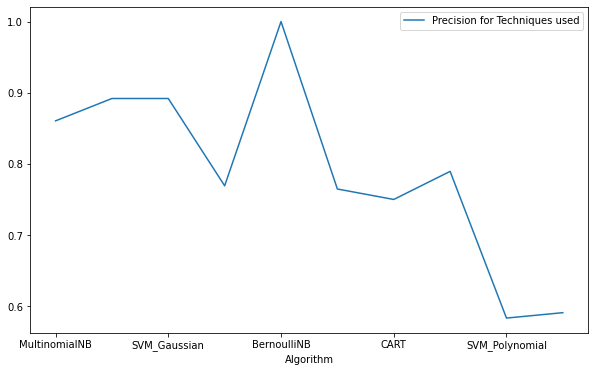

In [20]:
performance_eminem.plot(x='Algorithm', y='Precision', label='Precision for Techniques used', figsize = [10,6] )

## TUNING RESULT USING GRID SEARCH  

In [21]:
'''
    Tuning the support vectors for Linear, Polynomial and Gaussian to give the optimal parameter
'''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'C':[0.5,1,10,100,0.1,0.01],
        'gamma':['scale',1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
C,g,k = optimal_params.fit(X_train, y_train).best_params_.values()
print(f"-----------")
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")


-----------
C = 100
gamma = 0.1
kernel = rbf


In [22]:

'''
    Tuning the Naive Bayes method for Bernoulli, Multinomial and Gaussian to give the optimal parameter
'''

param_grid_nb = {
        'var_smoothing': np.logspace(0, -9, num = 100)
    }

optimal_params = GridSearchCV(estimator = GaussianNB(),param_grid= param_grid_nb,
    cv=10,
    scoring='accuracy',
    verbose=1
) # [multinomialNB, GaussianNB, BernouliNB]
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0657933224657568)


In [23]:

'''
    Tuning the Naive Bayes method for KNNeigbor
'''

param_grid_knn = {
        'n_neighbors': [1,3,5,7,9]
    }

optimal_params = GridSearchCV(estimator = KNeighborsClassifier(),param_grid= param_grid_knn,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


KNeighborsClassifier(n_neighbors=1)


In [24]:
'''
    Tuning the RandomForest 
'''

param_grid_rfc = {
        'n_estimators': [20,40,60,80,100]
    }

optimal_params = GridSearchCV(estimator = RandomForestClassifier(),param_grid= param_grid_rfc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)



RandomForestClassifier(n_estimators=80)


In [25]:
'''
    Tuning the RandomForest 
'''
param_grid_lrc = [
{
        'C': [10, 15,20,30],
     }

]

optimal_params = GridSearchCV(estimator = LogisticRegression(),param_grid= param_grid_lrc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


LogisticRegression(C=10)


In [26]:
'''
    Tuning the Decision Tree (CART) 
'''
param_grid_dtc = [
{
        'criterion': ["gini"],
        'random_state':[None, 1,2,4,8,10]
     }

]

optimal_params = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= param_grid_dtc,
    cv= 10,
    scoring ='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

DecisionTreeClassifier(random_state=2)


## OPTIMIZED MODEL(Performance)

             Algorithm  Accuracy  Precision  F_scores  MCC_scores
8        MultinomialNB  0.855422   0.860465  0.860465    0.710465
0           SVM_Linear  0.831325   0.891892  0.825000    0.670962
2         SVM_Gaussian  0.831325   0.891892  0.825000    0.670962
5  LogisticsRegression  0.819277   0.769231  0.842105    0.651002
9          BernoulliNB  0.783133   1.000000  0.735294    0.633216
6         RandomForest  0.807229   0.764706  0.829787    0.595974
4                 CART  0.771084   0.750000  0.791209    0.520444
7           GaussianNB  0.746988   0.789474  0.740741    0.499127
1       SVM_Polynomial  0.626506   0.583333  0.730435    0.334147
3           KNNeighbor  0.626506   0.590909  0.715596    0.287218


<AxesSubplot:xlabel='Algorithm'>

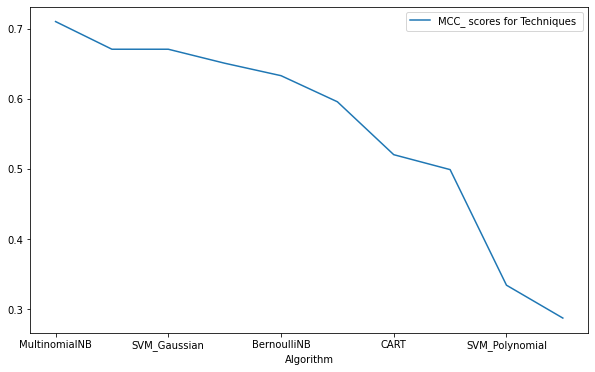

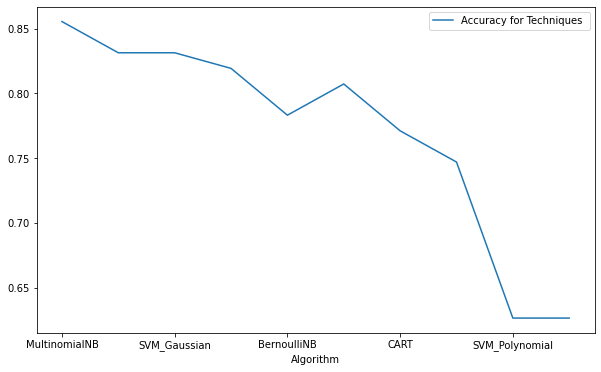

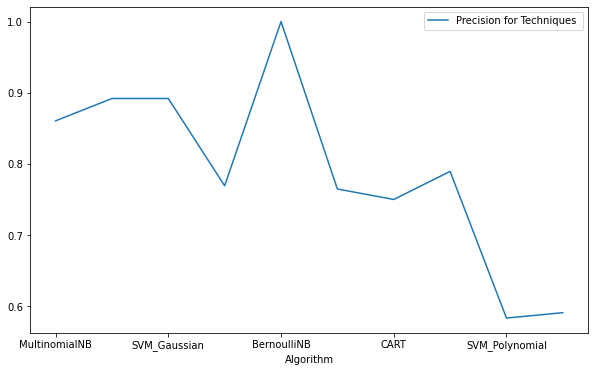

In [27]:
svc_Linear = SVC(kernel='linear', C=1, gamma = "scale", random_state=0)
svc_Polynomial = SVC(kernel='poly', C= 1, gamma = "scale")
svc_Gaussian = SVC(kernel='sigmoid',C = 10, gamma= 0.1)
knc = KNeighborsClassifier(n_neighbors=1, algorithm= "auto")
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1', C = 10)
rfc = RandomForestClassifier(n_estimators=20, random_state=40)
gnb = GaussianNB( var_smoothing=0.0657933224657568)
bnb = BernoulliNB()

clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_eminem = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
print(performance_eminem)

performance_eminem.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques ', figsize = [10,6] )

performance_eminem.plot(x='Algorithm', y='Accuracy', label='Accuracy for Techniques ', figsize = [10,6] )

performance_eminem.plot(x='Algorithm', y='Precision', label='Precision for Techniques ', figsize = [10,6] )

<AxesSubplot:>

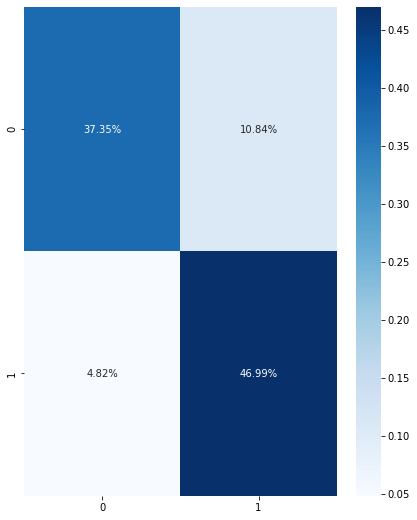

In [28]:
import seaborn as sns

'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''
svc_Linear.fit(X_train,y_train)
y_pred_svc = svc_Linear.predict(X_test)
cm = confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


<AxesSubplot:>

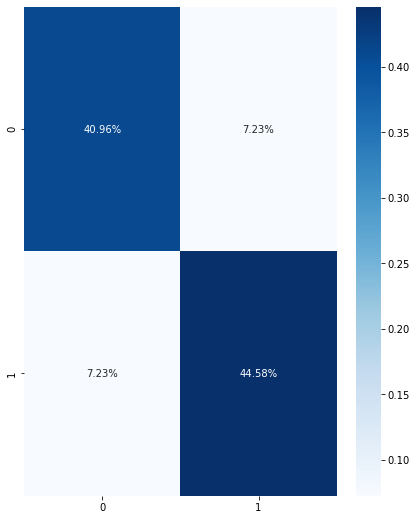

In [29]:
'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred_mnb)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
